### * https://goo.gl/ET1RMc 의 내용을  참고하여 아래 순서를 따라 [ 구글 계정 앱 비밀번호 ] 를 사전에 생성해주세요
<br>

<p style='color:red; font-size:1.5em;'>1. Chrome 에서 <b><a href='https://myaccount.google.com/security'>https://myaccount.google.com/security</a></b> 에 접속합니다.</p>
<p style='font-size:1.5em;'>2. 구글 계정에 로그인합니다. (기관/기업 계정이 아닌 <b style='color:red;'>개인 구글 계정으로 로그인</b>해주세요.)</p>
<p style='font-size:1.5em;'>3. 아래 스크린샷에서 <b style='color:red;'>"2단계 인증"을 먼저 활성화</b>해주셔야 <b>"앱 비밀번호"</b> 영역이 나타납니다. </p>

<br>
<hr style='border-top: 2px solid black;'>

# 1.

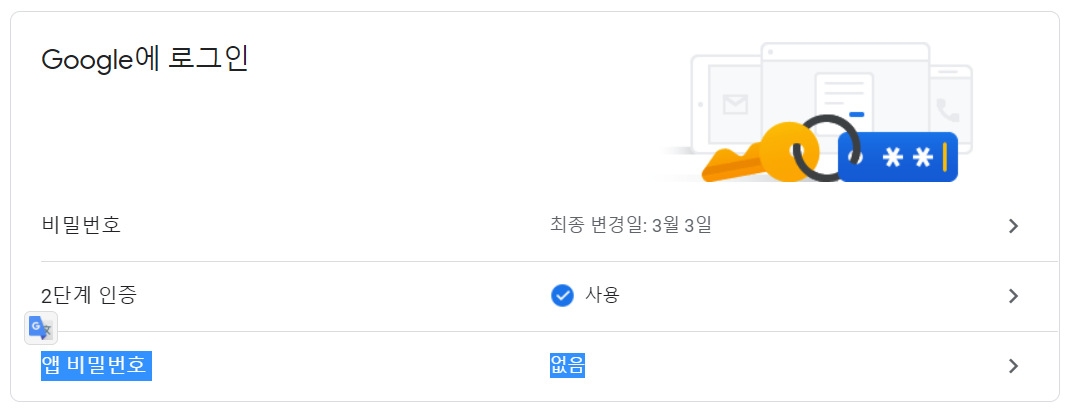

<br>
<hr style='border-top: 2px solid black;'>
<br>

# 2.

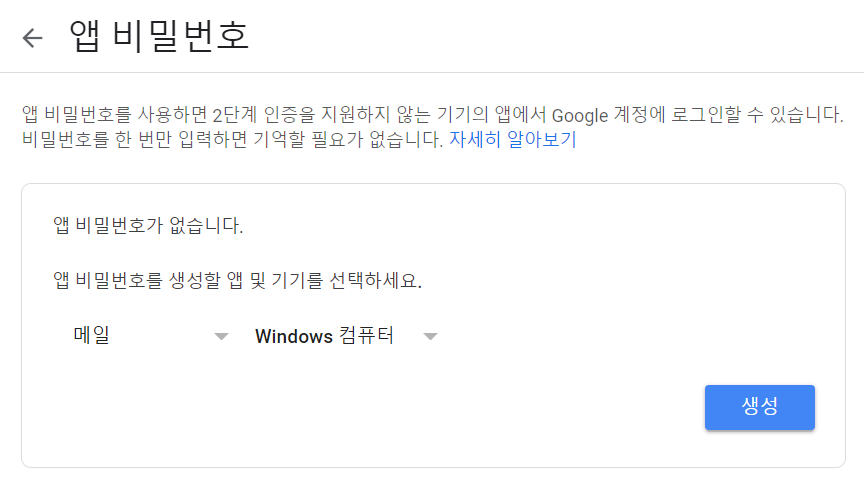

<br>
<hr style='border-top: 2px solid black;'>
<br>

# 3.

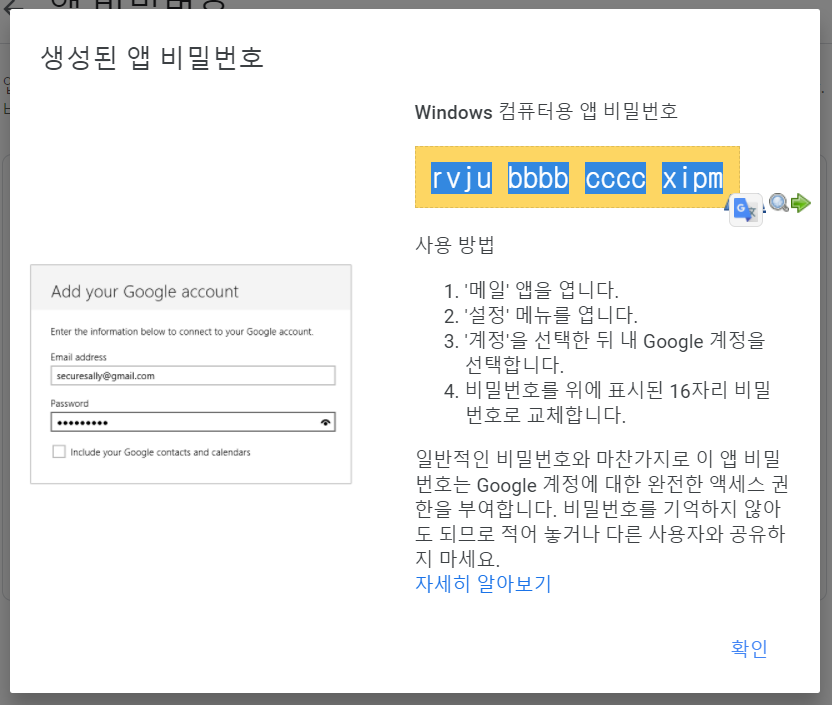

<br>
<hr style='border-top: 2px solid black;'>

In [1]:
import time
from urllib.request import urlopen 
from bs4 import BeautifulSoup

In [2]:
import smtplib
from email.mime.text import MIMEText

def sendMail(sender, receiver, msg):
    smtp = smtplib.SMTP_SSL('smtp.gmail.com', 465)
    smtp.login(sender, '?????') # 위 사전 세팅에서 얻어진 16글자의 [구글 계정 앱 비밀번호]를 '?????'에 입력해주세요.
    
    msg = MIMEText(msg)
    msg['Subject'] = 'Product is available!'
    
    smtp.sendmail(sender, receiver, msg.as_string())
    smtp.quit()

In [3]:
# 아래 와디즈 플랫폼에서 1) 아직 펀딩이 진행 중이나 2) (슈퍼얼리버드 등) 일부 가격옵션이 매진된 상품으로 URL을 변경하겠습니다.

url = 'https://www.wadiz.kr/web/campaign/detail/18614'

In [5]:
webpage = urlopen(url)
source = BeautifulSoup(webpage, 'html.parser')

target = source.find_all('button', {'class':'rightinfo-reward-list'})

In [ ]:
check_status = 1

while check_status: # check_status == 1
    webpage = urlopen(url)
    source = BeautifulSoup(webpage, 'html.parser')
    target = source.find_all('button', {'class':'rightinfo-reward-list'})
    
    for item in target: 
        if item.find('dt').text.strip() == '99,800원 펀딩': 
            if len(item.attrs['class']) == 2: 
                sendMail('repositivator@gmail.com', 'repositivator@gmail.com', '99800 Available \n https://goo.gl/wG8v1F')
                check_status = 0
                
    time.sleep(10)